In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
df = pd.read_csv('ABS _ Recruiting and Enrollment Data 20240411-161419.csv')
df.head(5)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 31937: invalid start byte

## Transformations

Handling all missing values

In [ ]:
######## Fill in missing values for specific columns with specified default texts
df['Application Referral Source'] = df['Application Referral Source'].fillna('No referral provided')
df['Country'] = df['Country'].fillna('No Country provided')
df['State'] = df['State'].fillna('No State provided')
df['Previous Degree Insitution'] = df['Previous Degree Insitution'].fillna('Not provided')
# df['Tests - GMAT Total'] = df['Tests - GMAT Total'].fillna('No Record')
# df['Applications Scholarship Tier - Admit'] = df['Applications Scholarship Tier - Admit'].fillna('Not considered for award')
# Remove rows where age is less than 20
df = df[df['Age'] >= 20]


####### GPA categorization
# Define bins and labels for GPA categorization
bins = [0, 2.5, 3.5, 4.0]  # Adjust according to your GPA scale
labels = ['Low (0-2.5)', 'Medium (2.5-3.5)', 'High (3.5-4.0)']

# Include 'Unknown' in the categories
categories = pd.CategoricalDtype(categories=labels + ['Unknown'], ordered=True)

# Categorize 'GPA (Recalculated)'
df['GPA (Recalculated) Category'] = pd.cut(df['GPA (Recalculated)'], bins=bins, labels=labels, include_lowest=True)
df['GPA (Recalculated) Category'] = df['GPA (Recalculated) Category'].astype(categories).fillna('Unknown')

# Categorize 'GPA (Converted)'
df['GPA (Converted) Category'] = pd.cut(df['GPA (Converted)'], bins=bins, labels=labels, include_lowest=True)
df['GPA (Converted) Category'] = df['GPA (Converted) Category'].astype(categories).fillna('Unknown')

# Optionally, display the DataFrame to verify the updates
print(df[['GPA (Recalculated)', 'GPA (Recalculated) Category', 'GPA (Converted)', 'GPA (Converted) Category']].head())

# ######### Visa Type 
# # if ('Visa Type' blank and 'Application Status' = 'Awaiting Submission' and 'Country' not in 'United States' ) 
# # then populate Visa Type 'International-not yet filled', else populate the blanks in 'Visa Type' as 'Incorrectly filled'

# # Check if 'Country' is a categorical column and add 'Unknown Country' if needed
# if pd.api.types.is_categorical_dtype(df['Country']):
#     df['Country'] = df['Country'].cat.add_categories(['Unknown Country'])

# # Now fill NaN values with 'Unknown Country'
# df['Country'] = df['Country'].fillna('Unknown Country')

# # Continue with your existing conditions and np.where usage
# condition_international = (
#     (df['Visa Type'] == '') & 
#     (df['Application Status'] == 'Awaiting Submission') & 
#     (df['Country'] != 'United States')
# )

# # Use numpy.where to update 'Visa Type' based on the condition
# df['Visa Type'] = np.where(
#     condition_international,
#     'International-not yet filled',
#     np.where(df['Visa Type'] == '', 'Incorrectly filled', df['Visa Type'])
# )


########### DATE
# Convert dates to datetime format where applicable
df['Record Created Date'] = pd.to_datetime(df['Record Created Date'], errors = 'coerce')
df['Application Created Date'] = pd.to_datetime(df['Application Created Date'], errors = 'coerce')


# Convert 'Decisions Released Date' without filling blanks
df['Decisions Released Date'] = pd.to_datetime(df['Decisions Released Date'], errors='coerce')

# Now 'Decisions Released Date' will have NaT for blanks, and other date fields are also in datetime format.

# Optionally check the data types to confirm the conversion
print(df.dtypes)

df.head()



   GPA (Recalculated) GPA (Recalculated) Category  GPA (Converted)  \
0                 NaN                     Unknown             3.31   
1                 NaN                     Unknown              NaN   
2                 NaN                     Unknown              NaN   
3                 NaN                     Unknown              NaN   
4                 NaN                     Unknown              NaN   

  GPA (Converted) Category  
0         Medium (2.5-3.5)  
1                  Unknown  
2                  Unknown  
3                  Unknown  
4                  Unknown  


/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_35221/368531092.py:59: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Record Created Date'] = pd.to_datetime(df['Record Created Date'], errors = 'coerce')
/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_35221/368531092.py:60: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Application Created Date'] = pd.to_datetime(df['Application Created Date'], errors = 'coerce')
/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_35221/368531092.py:64: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Deci

Reference ID                                      int64
Record Created Date                      datetime64[ns]
Primary Inquiry Program                          object
Primary Inquiry Term                             object
Application Referral Source                      object
Application Created Date                 datetime64[ns]
Application Status                               object
Application Program                              object
Application Start Term                           object
Decisions Released Date                  datetime64[ns]
Decision Reason                                  object
Country                                          object
State                                            object
Visa Type                                        object
Previous Degree Insitution                       object
Tests - GMAT Total                              float64
GPA (Recalculated)                              float64
GPA (Converted)                                 

,Reference ID,Record Created Date,Primary Inquiry Program,Primary Inquiry Term,Application Referral Source,Application Created Date,Application Status,Application Program,Application Start Term,Decisions Released Date,...,GPA (Recalculated),GPA (Converted),Age,Race,Sex,Intend to apply for financial aid,Applications Registered in Colleague,Applications Scholarship Tier - Admit,GPA (Recalculated) Category,GPA (Converted) Category
0,826319459,2018-10-19 13:17:00,Business Analytics - MSBA - Online Instruction,Spring 2024,SU Web Site,2016-10-14 00:00:00,Decided,Business Administration (Professional) - MBA,Fall 2017,2019-01-05 19:00:00,...,NaN,3.31,33.0,More than one race,M,1,0,NaN,Unknown,Medium (2.5-3.5)
1,295633352,2018-10-19 13:17:00,Business Analytics - MSBA,Fall 2018,No referral provided,2017-12-27 00:00:00,Decided,Business Analytics - MSBA,Fall 2018,2019-02-05 12:39:00,...,NaN,NaN,31.0,Unknown,F,1,0,NaN,Unknown,Unknown
2,173111,2023-12-03 06:54:00,Business Administration (Professional) - MBA,Winter 2024,Graduate Programs Search,2023-12-03 06:56:00,Decided,Business Administration (Professional) - MBA,Winter 2024,2024-10-01 14:15:00,...,NaN,NaN,30.0,Black or African American,M,1,0,2023-G5 - $6000,Unknown,Unknown
3,368489358,2018-10-19 13:04:00,Sport Business Leadership- MSBL,Summer 2017,No referral provided,2017-01-24 00:00:00,Decided,Sport Business Leadership- MSBL,Summer 2017,2019-02-05 12:47:00,...,NaN,NaN,28.0,White - Caucasian/European,M,1,0,NaN,Unknown,Unknown
4,490429256,2018-10-19 13:17:00,Accounting (Professional) - MPAC,Summer 2017,No referral provided,2017-09-03 00:00:00,Decided,Accounting (Professional) - MPAC,Summer 2017,2019-02-05 12:47:00,...,NaN,NaN,28.0,White - Caucasian/European,F,1,0,NaN,Unknown,Unknown


In [ ]:
###### VISA TYPE

# Step 1: Fill 'Visa Type' based on specific conditions
# Convert 'Visa Type' to string for condition checking if it's categorical
if pd.api.types.is_categorical_dtype(df['Visa Type']):
    visa_type_str = df['Visa Type'].astype(str)
else:
    visa_type_str = df['Visa Type']

# Condition for applicants who are "Awaiting Submission" and outside the US
condition_international_not_filled = (
    (visa_type_str.isna() | (visa_type_str == '')) &
    (df['Application Status'] == 'Awaiting Submission') &
    (df['Country'] != 'United States')
)

# Apply the condition to populate 'International-not yet filled'
df.loc[condition_international_not_filled, 'Visa Type'] = 'International-not yet filled'

# Condition to fill other blanks with 'Incorrectly filled'
condition_fill_incorrectly = (
    (visa_type_str.isna() | (visa_type_str == '')) & 
    ~condition_international_not_filled
)
df.loc[condition_fill_incorrectly, 'Visa Type'] = 'Incorrectly filled'

# Step 2: Convert 'Visa Type' back to categorical if it was categorical
if pd.api.types.is_categorical_dtype(df['Visa Type']):
    df['Visa Type'] = df['Visa Type'].astype('category')

# Verification: Check how the new categories are distributed
print(df['Visa Type'].value_counts())



Visa Type
F-1  Student                                      4803
Incorrectly filled                                3519
International-not yet filled                      1481
NA  Not Applicable                                 180
H-4  Dependent of H Visa Holder                    174
H-1B  Temporary Work Visa                           31
B-1   Temporary Business Visa                       26
I-485  Pending Application RA                       15
L-2  Dependent of L-1 Visa Holder                   13
J-1  Exchange Visitor                               11
L-2  Spouse/Child of L-1 Visa                       11
L-1 Intracompany Trans Visa                          7
ASYL  Asylee                                         6
I-589  Application for Asylum                        5
TD  NAFTA Dependent                                  5
TN  NAFTA Professional                               4
A-1  Foreign Diplomatic Personnel                    2
Other                                                2


/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_35221/2267917961.py:5: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df['Visa Type']):
/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_35221/2267917961.py:28: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df['Visa Type']):


In [ ]:
###### Scholarship categories
# Check if the column is categorical and add 'Not valid for Award' to its categories if needed
if pd.api.types.is_categorical_dtype(df['Applications Scholarship Tier - Admit']):
    if 'Not valid for Award' not in df['Applications Scholarship Tier - Admit'].cat.categories:
        df['Applications Scholarship Tier - Admit'] = df['Applications Scholarship Tier - Admit'].cat.add_categories(['Not valid for Award'])
# Fill in missing values with 'Not valid for Award'
df['Applications Scholarship Tier - Admit'] = df['Applications Scholarship Tier - Admit'].fillna('Not valid for Award')
# Verify the changes
print(df['Applications Scholarship Tier - Admit'].value_counts())
print(df['Applications Scholarship Tier - Admit'].dtype)
# Fill blanks in the original scholarship column
df['Applications Scholarship Tier - Admit'] = df['Applications Scholarship Tier - Admit'].fillna('Not valid for Award')

# Extract tier number and amount from the scholarship tier description
df['Tier Number'] = df['Applications Scholarship Tier - Admit'].str.extract(r'G(\d+)').astype(float)
df['Scholarship Amount'] = df['Applications Scholarship Tier - Admit'].str.extract(r'\$(\d+)').astype(float)

# Function to categorize based on amount
def categorize_tier(row):
    if row['Applications Scholarship Tier - Admit'] == 'Not valid for Award':
        return 'Not valid for Award'
    if row['Scholarship Amount'] == 0:
        return 'Not awarded-$0'
    if 1200 <= row['Scholarship Amount'] <= 3600:
        return 'Awarded $1200-$3600'
    if 4800 <= row['Scholarship Amount'] <= 7200:
        return 'Awarded $4800-$7200'
    if 8400 <= row['Scholarship Amount'] <= 10800:
        return 'Awarded $8400-$10800'
    if row['Scholarship Amount'] == 12000:
        return 'Awarded highest-$12000'
    return 'Other'

# Apply the function to create a new categorized column
df['Scholarship Category'] = df.apply(categorize_tier, axis=1)

# Check the newly created categories
print(df['Scholarship Category'].value_counts())

Applications Scholarship Tier - Admit
Not valid for Award    6738
2022-G0 - $0            555
2021-G0 - $0            471
2023-G0 - $0            419
2020-G0 - $0            391
2019-G0 - $0            289
2018-G0 - $0            211
2023-G4 - $4800         157
2024-G0 - $0            112
2024-G4 - $4800          88
2022-G2 - $2400          67
2017-G0 - $0             64
2023-G5 - $6000          63
2021-G2 - $2400          55
2023-G6 - $7200          54
2022-G3 - $3600          47
2023-G3 - $3600          46
2021-G3 - $3600          39
2022-G4 - $4800          39
2021-G4 - $4800          34
2024-G6 - $7200          32
2022-G5 - $6000          32
2023-G8 - $9600          25
2024-G5 - $6000          22
2023-G1 - $1200          21
2020-G3 - $3600          18
2022-G6 - $7200          17
2024-G8 - $9600          17
2020-G4 - $4800          17
2024-G1 - $1200          16
2024-G3 - $3600          13
2021-G5 - $6000          13
2023-G7 - $8400          11
2020-G2 - $2400          11
2021-G6 - 

/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_35221/1451638135.py:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df['Applications Scholarship Tier - Admit']):


Scholarship Category
Not valid for Award       6738
Not awarded-$0            2512
Awarded $4800-$7200        586
Awarded $1200-$3600        363
Awarded $8400-$10800        96
Awarded highest-$12000       5
Name: count, dtype: int64


In [ ]:


# Define all categorical columns, making sure to only include those that genuinely should be categorical
categorical_columns = [
    'Primary Inquiry Program', 'Primary Inquiry Term', 'Application Referral Source', 
    'Application Status', 'Application Program', 'Application Start Term', 'Decision Reason', 
    'Country', 'State', 'Visa Type', 'Previous Degree Insitution', 'Race', 'Sex',
    'Applications Scholarship Tier - Admit', 'Scholarship Tier-Amount'
]

# Convert relevant fields to categorical, checking their current type and adding categories if necessary
for col in categorical_columns:
    if col in df.columns:
        if not pd.api.types.is_categorical_dtype(df[col]):
            df[col] = df[col].astype('category')
        if col == 'Applications Scholarship Tier - Admit' and 'Not valid for Award' not in df[col].cat.categories:
            df[col] = df[col].cat.add_categories(['Not valid for Award'])

# Fill missing values in 'Applications Scholarship Tier - Admit' after adding the category
df['Applications Scholarship Tier - Admit'] = df['Applications Scholarship Tier - Admit'].fillna('Not valid for Award')

# Check the data types and category handling
print(df.dtypes)
print(df['Applications Scholarship Tier - Admit'].cat.categories)

# Converting numeric and datetime fields back to more appropriate types
df['Tests - GMAT Total'] = pd.to_numeric(df['Tests - GMAT Total'], errors='coerce')
df['GPA (Recalculated)'] = pd.to_numeric(df['GPA (Recalculated)'], errors='coerce')
df['GPA (Converted)'] = pd.to_numeric(df['GPA (Converted)'], errors='coerce')
df['Decisions Released Date'] = pd.to_datetime(df['Decisions Released Date'], errors='coerce')

# Confirming changes
print(df[['Tests - GMAT Total', 'GPA (Recalculated)', 'GPA (Converted)', 'Decisions Released Date']].dtypes)



Reference ID                                      int64
Record Created Date                      datetime64[ns]
Primary Inquiry Program                        category
Primary Inquiry Term                           category
Application Referral Source                    category
Application Created Date                 datetime64[ns]
Application Status                             category
Application Program                            category
Application Start Term                         category
Decisions Released Date                  datetime64[ns]
Decision Reason                                category
Country                                        category
State                                          category
Visa Type                                      category
Previous Degree Insitution                     category
Tests - GMAT Total                              float64
GPA (Recalculated)                              float64
GPA (Converted)                                 

/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_35221/4048795482.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[col]):
/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_35221/4048795482.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[col]):
/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_35221/4048795482.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[col]):
/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_35221/4048795482.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be r

In [ ]:
# Display the data types of all columns
print(df.dtypes)

# Display the first few rows of the DataFrame to inspect the data
print(df.head())

# Optionally, display a summary of the DataFrame to see all columns, non-null counts, and data types
print(df.info())


Reference ID                                      int64
Record Created Date                      datetime64[ns]
Primary Inquiry Program                        category
Primary Inquiry Term                           category
Application Referral Source                    category
Application Created Date                 datetime64[ns]
Application Status                             category
Application Program                            category
Application Start Term                         category
Decisions Released Date                  datetime64[ns]
Decision Reason                                category
Country                                        category
State                                          category
Visa Type                                      category
Previous Degree Insitution                     category
Tests - GMAT Total                              float64
GPA (Recalculated)                              float64
GPA (Converted)                                 

In [ ]:
# Display the first few rows of the DataFrame to inspect the data
print(df.head())

# Optionally, display a summary of the DataFrame to see all columns, non-null counts, and data types
print(df.info())



   Reference ID Record Created Date  \
0     826319459 2018-10-19 13:17:00   
1     295633352 2018-10-19 13:17:00   
2        173111 2023-12-03 06:54:00   
3     368489358 2018-10-19 13:04:00   
4     490429256 2018-10-19 13:17:00   

                          Primary Inquiry Program Primary Inquiry Term  \
0  Business Analytics - MSBA - Online Instruction          Spring 2024   
1                       Business Analytics - MSBA            Fall 2018   
2    Business Administration (Professional) - MBA          Winter 2024   
3                 Sport Business Leadership- MSBL          Summer 2017   
4                Accounting (Professional) - MPAC          Summer 2017   

  Application Referral Source Application Created Date Application Status  \
0                 SU Web Site      2016-10-14 00:00:00            Decided   
1        No referral provided      2017-12-27 00:00:00            Decided   
2    Graduate Programs Search      2023-12-03 06:56:00            Decided   
3        No 

In [ ]:
# Export the DataFrame to a CSV file
# df.to_csv('UpdatedEnrollmentDataFrame.csv', index=False)  # Set index=False to exclude row indices from the file

In [ ]:
df.head()

,Reference ID,Record Created Date,Primary Inquiry Program,Primary Inquiry Term,Application Referral Source,Application Created Date,Application Status,Application Program,Application Start Term,Decisions Released Date,...,Race,Sex,Intend to apply for financial aid,Applications Registered in Colleague,Applications Scholarship Tier - Admit,GPA (Recalculated) Category,GPA (Converted) Category,Tier Number,Scholarship Amount,Scholarship Category
0,826319459,2018-10-19 13:17:00,Business Analytics - MSBA - Online Instruction,Spring 2024,SU Web Site,2016-10-14 00:00:00,Decided,Business Administration (Professional) - MBA,Fall 2017,2019-01-05 19:00:00,...,More than one race,M,1,0,Not valid for Award,Unknown,Medium (2.5-3.5),NaN,NaN,Not valid for Award
1,295633352,2018-10-19 13:17:00,Business Analytics - MSBA,Fall 2018,No referral provided,2017-12-27 00:00:00,Decided,Business Analytics - MSBA,Fall 2018,2019-02-05 12:39:00,...,Unknown,F,1,0,Not valid for Award,Unknown,Unknown,NaN,NaN,Not valid for Award
2,173111,2023-12-03 06:54:00,Business Administration (Professional) - MBA,Winter 2024,Graduate Programs Search,2023-12-03 06:56:00,Decided,Business Administration (Professional) - MBA,Winter 2024,2024-10-01 14:15:00,...,Black or African American,M,1,0,2023-G5 - $6000,Unknown,Unknown,5.0,6000.0,Awarded $4800-$7200
3,368489358,2018-10-19 13:04:00,Sport Business Leadership- MSBL,Summer 2017,No referral provided,2017-01-24 00:00:00,Decided,Sport Business Leadership- MSBL,Summer 2017,2019-02-05 12:47:00,...,White - Caucasian/European,M,1,0,Not valid for Award,Unknown,Unknown,NaN,NaN,Not valid for Award
4,490429256,2018-10-19 13:17:00,Accounting (Professional) - MPAC,Summer 2017,No referral provided,2017-09-03 00:00:00,Decided,Accounting (Professional) - MPAC,Summer 2017,2019-02-05 12:47:00,...,White - Caucasian/European,F,1,0,Not valid for Award,Unknown,Unknown,NaN,NaN,Not valid for Award


## Enrolled 
Subset with Colleague ==1 and valid decision reasons: these are the ones who are enrolled

In [ ]:

# Code to find unique decision reasons where 'colleague' column equals 1
unique_decision_reasons = df[df['Applications Registered in Colleague'] == 1]['Decision Reason'].unique()
for reason in unique_decision_reasons:
    print(reason)


Deposit - Not Required
Update Major - Post Enroll(CF)
Rejected - Soft Deny
Deposit Paid
Admit Declined - Post Enroll(CF)
Admit Conditional
Update Term - Post Enroll(CF)
Application Incomplete - Closed
Scholarship Adjustment
Update Term & Major - Pre Decision
No Show - Post Enroll(CF)
Rejected - No Alternatives
Application Closed - Wrong Program/Duplicate Application
Admit Regular
Request to Close
Deposit Waived/Not Required
Update Term - Post Decision
Decision Delayed
Update Major - Post Decision
Admit Declined
Rejected - Waitlist Deny
Application Closed
Admit Probation
Application Closed - Miscellaneous


In [ ]:
# Filter the dataframe for actual enrolled students
colleague_enrolled_all = (
    (df['Applications Registered in Colleague'] == 1))

colleague_enrolled_all = df[colleague_enrolled_all]

# Now `actual_enrolled` contains the subset of the data
colleague_enrolled_all.head()
len(colleague_enrolled_all)

1396

In [ ]:
# Filter the dataframe for actual enrolled students
colleague_unenrolled_all = (
    (df['Applications Registered in Colleague'] == 0) & (df['Application Status'] == 'Decided'))

colleague_unenrolled_all = df[colleague_unenrolled_all]

# Now `actual_enrolled` contains the subset of the data
colleague_unenrolled_all.head()
len(colleague_unenrolled_all)

4278

In [ ]:
unenrolled_students = df[df['Applications Registered in Colleague'] == 0]
unenrolled_students = unenrolled_students['Decision Reason'].unique()

# Print each unique decision reason vertically
for decision_reason in unenrolled_students:
    print(decision_reason)

Application Incomplete - Closed
Admit Declined - Post Enroll(CF)
Update Term - Post Enroll(CF)
Rejected - No Alternatives
Update Term - Post Decision
Admit Declined
Application Closed
Request to Close
Application Complete - Closed
Application Closed - Wrong Program/Duplicate Application
Deposit - Not Required
Rejected - Soft Deny
No Show - Post Enroll(CF)
Admit Conditional
Update Major - Post Decision
nan
Update Term - Pre Decision
Waitlist Invite
Application Closed - Miscellaneous
Update Term & Major - Post Decision
Decision Delayed
Rejected - Waitlist Deny
Deposit Paid
Update Major - Post Enroll(CF)
Wailist Declined
Waitlist Closed
Update Major - Pre Decision
Admit Conditional & Probationary
Application Closed - Fraud
Application Closed - Unrecognized/Unaccredited Inst or Prog
Update Term & Major - Post Enroll(CF)
Waitlist Accepted
Admit Conditional & Bridge
Scholarship Adjustment
Admit Regular
Update Term & Major - Pre Decision


In [ ]:
all_decisions = df['Decision Reason'].unique()
for decision_reason in all_decisions:
    print(decision_reason)

Application Incomplete - Closed
Admit Declined - Post Enroll(CF)
Update Term - Post Enroll(CF)
Rejected - No Alternatives
Deposit - Not Required
Update Term - Post Decision
Admit Declined
Application Closed
Request to Close
Application Complete - Closed
Application Closed - Wrong Program/Duplicate Application
Rejected - Soft Deny
Update Major - Post Enroll(CF)
No Show - Post Enroll(CF)
Admit Conditional
Update Major - Post Decision
nan
Update Term - Pre Decision
Waitlist Invite
Application Closed - Miscellaneous
Update Term & Major - Post Decision
Decision Delayed
Rejected - Waitlist Deny
Deposit Paid
Wailist Declined
Waitlist Closed
Update Major - Pre Decision
Admit Conditional & Probationary
Application Closed - Fraud
Application Closed - Unrecognized/Unaccredited Inst or Prog
Scholarship Adjustment
Update Term & Major - Pre Decision
Update Term & Major - Post Enroll(CF)
Waitlist Accepted
Admit Regular
Admit Conditional & Bridge
Deposit Waived/Not Required
Admit Probation


## Subsections

In [ ]:
# Filter the dataframe for actual enrolled students
actual_enrolled = (
    (df['Applications Registered in Colleague'] == 1) &
    (df['Decision Reason'].isin([
        'Admit Conditional',
        'Scholarship Adjustment',
        'Admit Regular',
        'Admit Probation',
        'Admit Conditional & Bridge'
        'Admit Conditional & Probationary'
        'Update Term - Post Enroll(CF)',
        'Update Major - Post Enroll(CF)',
        'Update Term & Major - Post Enroll(CF)'
        'Deposit Paid',
        'Deposit - Not Required',
        'Deposit Waived/Not Required'
    ]))
)

actual_enrolled = df[actual_enrolled]

# Now `actual_enrolled` contains the subset of the data
actual_enrolled.head()
len(actual_enrolled)

1263

## Descriptive analysis

In [ ]:
# Calculate descriptive statistics for enrolled and unenrolled groups
print("Descriptive Statistics for Enrolled Students:")
print(colleague_enrolled_all.describe())

print("\nDescriptive Statistics for Unenrolled Students:")
print(colleague_unenrolled_all.describe())


Descriptive Statistics for Enrolled Students:
       Reference ID            Record Created Date  \
count  1.396000e+03                           1396   
mean   4.580998e+08  2021-02-02 20:22:36.575931392   
min    8.349030e+05            2018-01-02 00:00:00   
25%    1.891824e+08            2020-01-04 17:33:30   
50%    4.475250e+08            2021-01-09 15:53:00   
75%    7.120829e+08            2022-03-13 09:40:00   
max    9.997895e+08            2024-11-02 19:02:00   
std    2.932305e+08                            NaN   

            Application Created Date        Decisions Released Date  \
count                           1396                           1396   
mean   2021-04-22 01:02:56.690544384  2021-07-01 13:38:32.191976960   
min              2018-01-11 13:38:00            2019-01-02 12:12:00   
25%              2020-04-15 04:11:45            2020-06-15 18:58:00   
50%              2021-03-17 03:28:00            2021-05-28 00:51:30   
75%              2022-05-02 01:14:30     

In [ ]:
# Assuming 'actual_enrolled' is your DataFrame for the actual enrolled subset
print("Descriptive Statistics for Actually Enrolled Students:")
print(actual_enrolled.describe())

# Comparing mean GPA between actual enrolled and all enrolled
mean_gpa_actual = np.mean(actual_enrolled['GPA (Converted)'])
mean_gpa_all_enrolled = np.mean(colleague_enrolled_all['GPA (Converted)'])

print(f"Mean GPA for Actually Enrolled: {mean_gpa_actual}")
print(f"Mean GPA for All Enrolled: {mean_gpa_all_enrolled}")


Descriptive Statistics for Actually Enrolled Students:
       Reference ID            Record Created Date  \
count  1.263000e+03                           1263   
mean   4.553118e+08  2021-01-05 06:17:50.308788736   
min    8.349030e+05            2018-01-02 00:00:00   
25%    1.874966e+08            2019-12-13 10:03:00   
50%    4.380972e+08            2020-12-08 17:53:00   
75%    7.093408e+08            2022-01-19 16:02:30   
max    9.997895e+08            2024-11-02 19:02:00   
std    2.935491e+08                            NaN   

            Application Created Date        Decisions Released Date  \
count                           1263                           1263   
mean   2021-03-18 10:10:39.667458304  2021-05-24 13:09:54.679334912   
min              2018-01-11 13:38:00            2019-01-02 12:12:00   
25%              2020-03-24 02:48:30            2020-05-27 03:45:00   
50%              2021-02-17 08:52:00            2021-04-28 22:37:00   
75%              2022-03-19 00:1

Correlation analysis for enrolled group

Visualizations Hist for Age

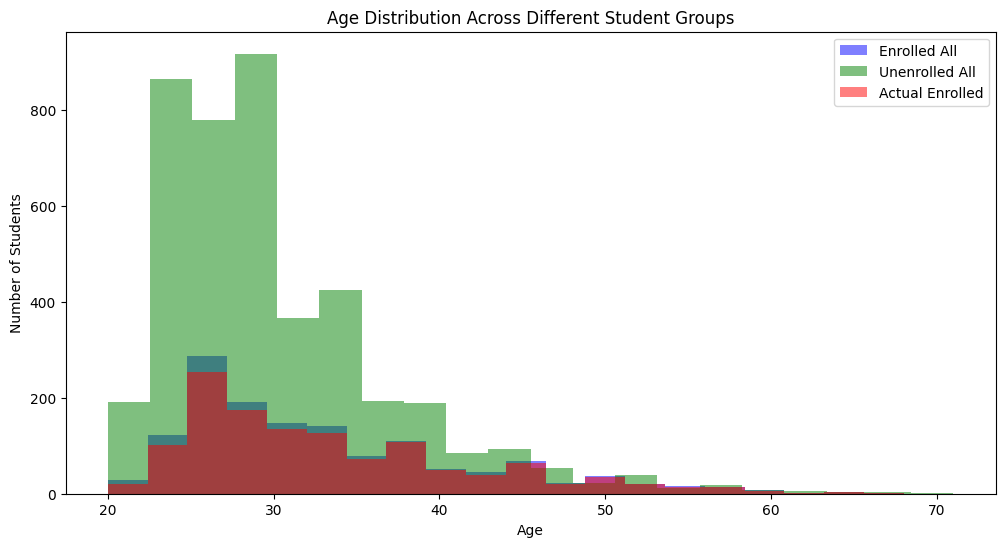

In [ ]:
import matplotlib.pyplot as plt

# Age distribution across different student groups
plt.figure(figsize=(12, 6))
plt.hist(colleague_enrolled_all['Age'].dropna(), bins=20, alpha=0.5, label='Enrolled All', color='blue')
plt.hist(colleague_unenrolled_all['Age'].dropna(), bins=20, alpha=0.5, label='Unenrolled All', color='green')
plt.hist(actual_enrolled['Age'].dropna(), bins=20, alpha=0.5, label='Actual Enrolled', color='red')
plt.title('Age Distribution Across Different Student Groups')
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.legend()
plt.show()



GPA comparison

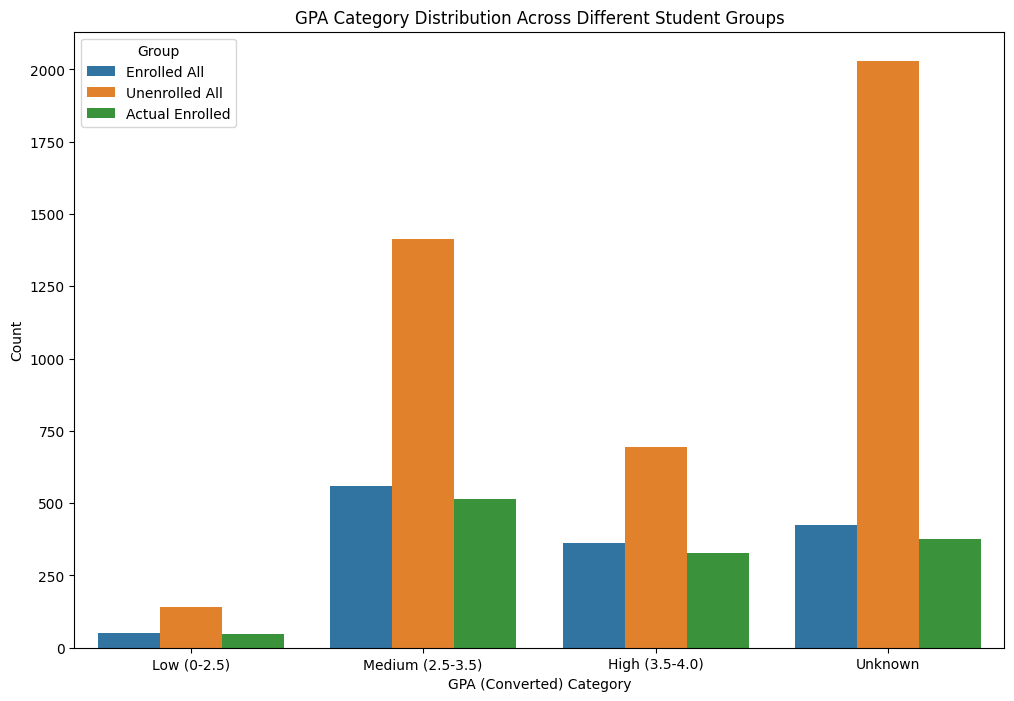

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame that concatenates all groups with a new 'Group' label
all_data = pd.concat([
    colleague_enrolled_all.assign(Group='Enrolled All'),
    colleague_unenrolled_all.assign(Group='Unenrolled All'),
    actual_enrolled.assign(Group='Actual Enrolled')
])

plt.figure(figsize=(12, 8))
sns.countplot(x='GPA (Converted) Category', hue='Group', data=all_data)
plt.title('GPA Category Distribution Across Different Student Groups')
plt.xlabel('GPA (Converted) Category')
plt.ylabel('Count')
plt.legend(title='Group')
plt.show()



/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_35221/3796941916.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='GPA (Converted) Category', y='Group', data=all_data, scale='count', inner='quartile')


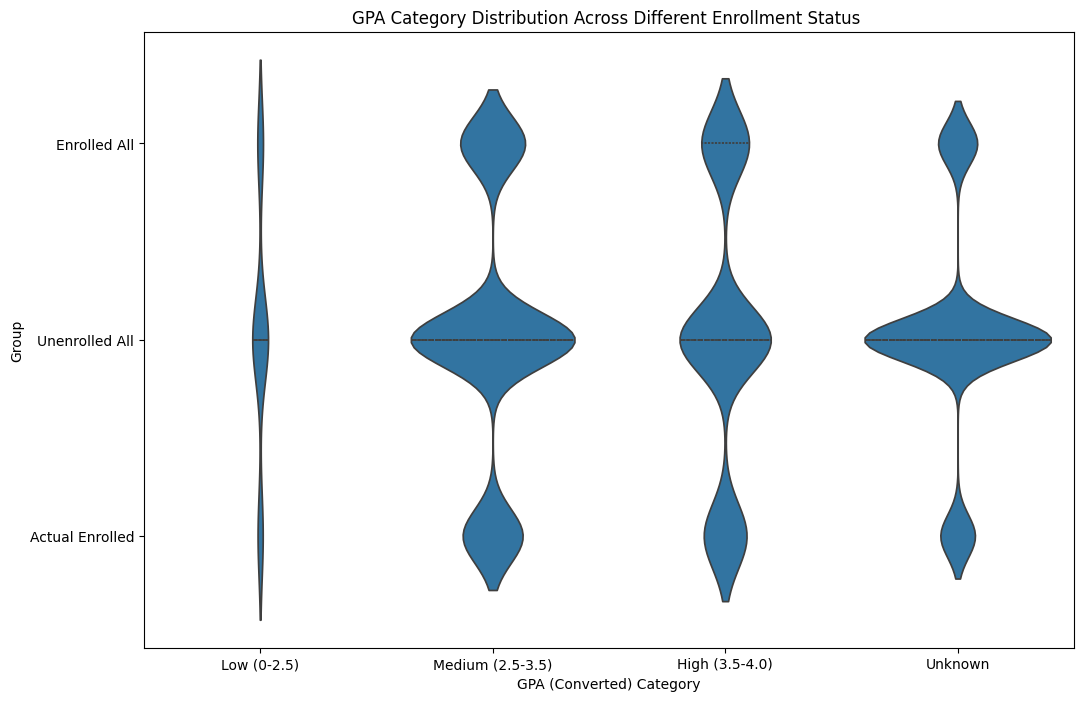

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='GPA (Converted) Category', y='Group', data=all_data, scale='count', inner='quartile')
plt.title('GPA Category Distribution Across Different Enrollment Status ')
plt.xlabel('GPA (Converted) Category')
plt.ylabel('Group')
plt.show()


The Medium (2.5-3.5) GPA category appears to be the most common among all groups.
The High (3.5-4.0) GPA category seems to have a similar distribution for Enrolled All and Actual Enrolled groups, which could suggest that students with higher GPAs are more likely to enroll.
The Low (0-2.5) GPA category shows a presence mainly in the Unenrolled All group, which might indicate that students with lower GPAs are less likely to enroll.
The Unknown category is present across all groups, but to interpret this further, we'd need to know more about why the GPA is unknown and how this category is handled during admissions.

/var/folders/80/ghdt2w012_x2yg018vx45m300000gn/T/ipykernel_35221/2190045667.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='GPA (Recalculated) Category', y='Group', data=all_data, scale='count', inner='quartile')


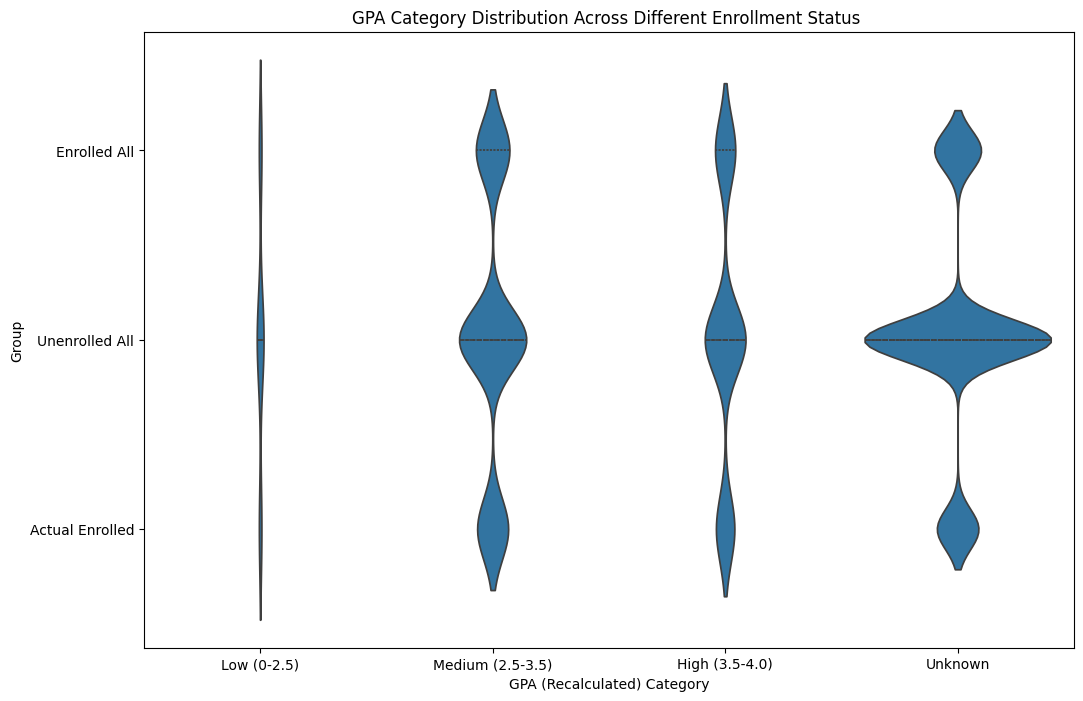

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='GPA (Recalculated) Category', y='Group', data=all_data, scale='count', inner='quartile')
plt.title('GPA Category Distribution Across Different Enrollment Status ')
plt.xlabel('GPA (Recalculated) Category')
plt.ylabel('Group')
plt.show()

Heat Map

In [ ]:
print(actual_enrolled.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1263 entries, 7 to 10355
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Reference ID                           1263 non-null   int64         
 1   Record Created Date                    1263 non-null   datetime64[ns]
 2   Primary Inquiry Program                1263 non-null   category      
 3   Primary Inquiry Term                   1263 non-null   category      
 4   Application Referral Source            1263 non-null   category      
 5   Application Created Date               1263 non-null   datetime64[ns]
 6   Application Status                     1263 non-null   category      
 7   Application Program                    1263 non-null   category      
 8   Application Start Term                 1263 non-null   category      
 9   Decisions Released Date                1263 non-null   datetime64[n

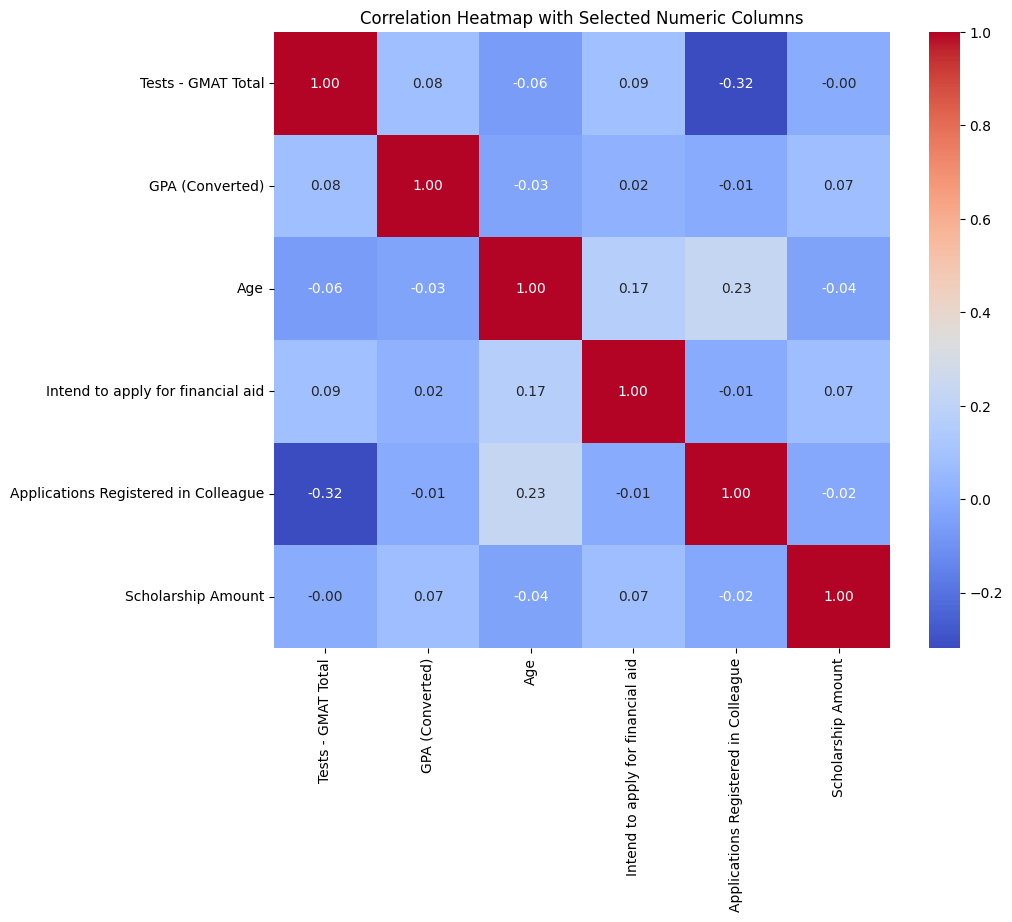

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame, replace 'df' with the actual name of your DataFrame

# Convert 'Scholarship Amount' to numeric, coercing any errors into NaN
df['Scholarship Amount'] = pd.to_numeric(df['Scholarship Amount'], errors='coerce')

# Select only numeric columns, excluding identifiers and redundant columns
numeric_cols = df.select_dtypes(include=[np.number])
numeric_cols = numeric_cols.drop(columns=['Reference ID', 'Tier Number', 'GPA (Recalculated)'])

# Handle NaN values (optional: you can choose to fill NaN with a value such as the mean or median if appropriate)
# numeric_cols = numeric_cols.fillna(numeric_cols.mean())

# Alternatively, if you prefer to drop rows with any NaN values
numeric_cols_cleaned = numeric_cols.dropna()

# Compute the correlation matrix
correlation_matrix = numeric_cols_cleaned.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap with Selected Numeric Columns')
plt.show()


4 year trend based on enrolled, actual enrolled

Enrollment Trend by Application Program

In [ ]:
import matplotlib.pyplot as plt
# Filter the DataFrame to only include records from 2020 to 2023
colleague_enrolled_all = colleague_enrolled_all[(colleague_enrolled_all['Year'] >= 2020) & (colleague_enrolled_all['Year'] <= 2023)]
colleague_unenrolled_all = colleague_unenrolled_all[(colleague_unenrolled_all['Year'] >= 2020) & (colleague_unenrolled_all['Year'] <= 2023)]
actual_enrolled = actual_enrolled[(actual_enrolled['Year'] >= 2020) & (actual_enrolled['Year'] <= 2023)]

# Now, group by 'Year' and count the number of decisions
trend_enrolled_all = colleague_enrolled_all.groupby('Year').size()
trend_unenrolled_all = colleague_unenrolled_all.groupby('Year').size()
trend_actual_enrolled = actual_enrolled.groupby('Year').size()

# Plot the trends for each subset
plt.figure(figsize=(12, 8))

# Check if the trends are not empty and plot them with annotations
if not trend_enrolled_all.empty:
    plt.plot(trend_enrolled_all.index, trend_enrolled_all.values, marker='o', label='Colleague Enrolled All', color='blue')

if not trend_unenrolled_all.empty:
    plt.plot(trend_unenrolled_all.index, trend_unenrolled_all.values, marker='x', label='Colleague Unenrolled All', color='orange')

if not trend_actual_enrolled.empty:
    plt.plot(trend_actual_enrolled.index, trend_actual_enrolled.values, marker='s', label='Actual Enrolled for classes', color='green')

# Annotations and adjustments
for trend in [trend_enrolled_all, trend_unenrolled_all, trend_actual_enrolled]:
    if not trend.empty:
        for x, y in zip(trend.index, trend.values):
            plt.annotate(f'{y}', xy=(x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Formatting the plot
plt.title('Enrollment Trend (2020 - 2023)')
plt.xlabel('Decisions Released Year')
plt.ylabel('Number of Decisions based on Applications')
plt.xticks([2020, 2021, 2022, 2023])  # Set x-ticks to years from 2020 to 2023
plt.xlim(2019.5, 2023.5)  # Slightly extend the x-axis limits to fit the annotations
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


KeyError: 'Year'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data has been properly grouped and filtered.

# Plot the trends for each subset
plt.figure(figsize=(12, 8))

# Plot each subset with clear markers and lines
# Colleague Enrolled All - Dotted Line
plt.plot(trend_enrolled_all.index, trend_enrolled_all.values, marker='o', color='blue', linestyle=':', label='Colleague Enrolled All')

# Colleague Unenrolled All - Dotted Line
plt.plot(trend_unenrolled_all.index, trend_unenrolled_all.values, marker='x', color='orange', linestyle=':', label='Colleague Unenrolled All')

# Actual Enrolled for classes - Solid Line
plt.plot(trend_actual_enrolled.index, trend_actual_enrolled.values, marker='s', color='green', linestyle='-', label='Actual Enrolled for classes')

# Add data labels to each point
for x, y in zip(trend_enrolled_all.index, trend_enrolled_all.values):
    plt.text(x, y + 10, f'{y}', ha='center', va='bottom', color='blue', fontsize=10)

for x, y in zip(trend_unenrolled_all.index, trend_unenrolled_all.values):
    plt.text(x, y + 10, f'{y}', ha='center', va='bottom', color='orange', fontsize=10)

# For Actual Enrolled, place the annotation below the line
for x, y in zip(trend_actual_enrolled.index, trend_actual_enrolled.values):
    plt.text(x, y - 10, f'{y}', ha='center', va='top', color='green', fontsize=10)  # 'va' changed to 'top'

# Formatting the plot
plt.title('Enrollment Trend (2020 - 2023)')
plt.xlabel('Decisions Released Year')
plt.ylabel('Number of Decisions based on Applications')
plt.legend()
plt.grid(True)
plt.xticks([2020, 2021, 2022, 2023])  # Set x-ticks to years from 2020 to 2023
plt.xlim(2019.5, 2023.5)  # Set x-axis limits to provide space for annotations
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()


NameError: name 'trend_enrolled_all' is not defined

<Figure size 1200x800 with 0 Axes>

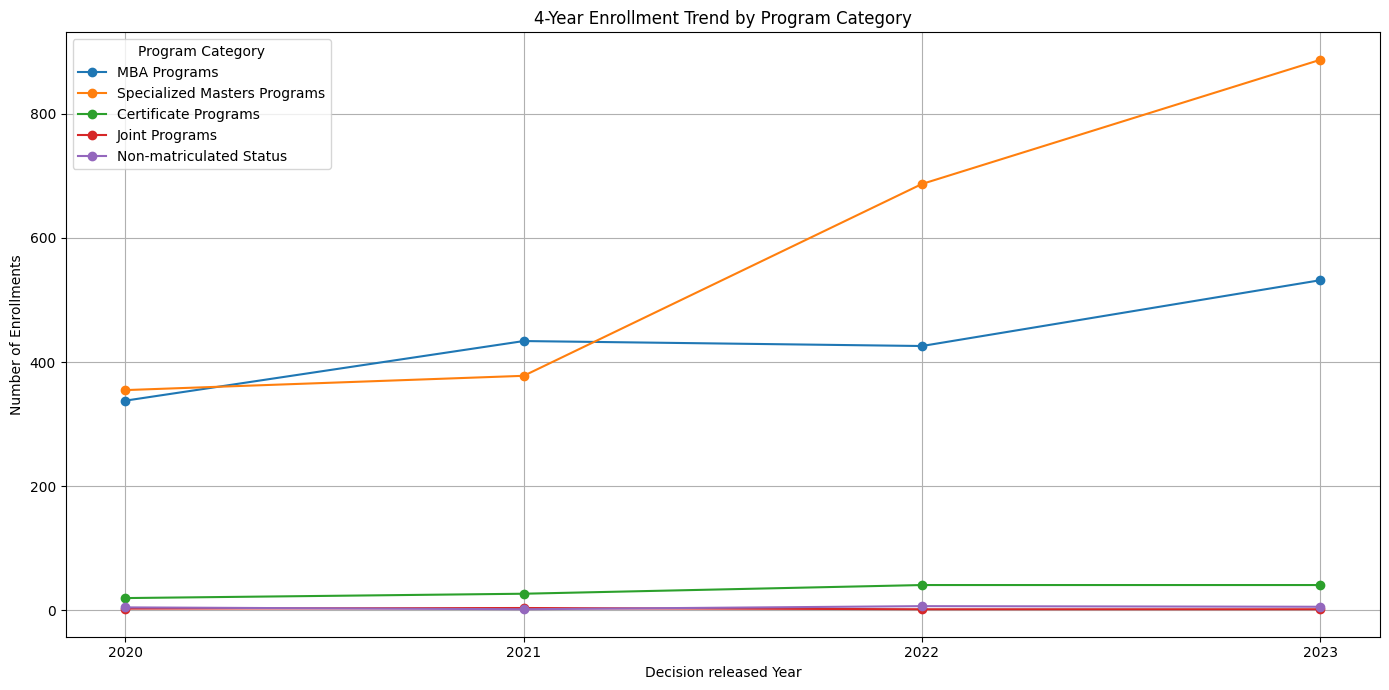

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your main DataFrame

# Updating the mapping categories with combined category for programs
program_categories = {
    'MBA Programs': ['Business Administration (Professional) - MBA', 'Leadership Executive Master of Business Administration - MBA',
                     'Business Administration - Bridge - MBA', 'Business Administration (Professional) - MBA - Online Instruction',
                     'Early Career Masters of Business Administration', 'Sport and Entertainment Management - MBA'],
    'Specialized Masters Programs': ['Finance - MSF', 'Business Analytics - MSBA', 'Accounting and Analytics - MS',
                                     'Sport Business Leadership- MSBL', 'Business Analytics - MSBA - Online Instruction',
                                     'Accounting (Professional) - MPAC', 'Accounting (Professional) - MPAC Advanced',
                                     'Business Analytics with Finance degrees - MSBA/MSF'],
    'Certificate Programs': ['Executive Leadership Certificate', 'Business Analytics Certificate', 'Marketing Certificate',
                             'Finance Certificate', 'Accounting Certificate', 'Global Business Certificate',
                             'Business Administration Certificate', 'Leadership Formation Certificate'],
    'Joint Programs': ['Business Administration (Professional), joint Juris Doctor - MBA/JD',
                                  'Accounting, Joint Juris Doctor - MPAC/JD', 'Sport Business Leadership, joint Juris Doctor - MSBL/JD'],
    'Non-matriculated Status': ['Non-Matriculated status - Albers School of Business and Economics']
}

# Map each program to its category
category_map = {program: category for category, programs in program_categories.items() for program in programs}
df['Program Category'] = df['Application Program'].map(category_map)

# Convert 'Decisions Released Date' to datetime and extract the year
df['Year'] = pd.to_datetime(df['Decisions Released Date'], errors='coerce').dt.year

# Ensure the DataFrame is filtered for the years 2020-2023 and non-null years
df_filtered = df[df['Year'].between(2020, 2023) & df['Year'].notnull()]

# Group data by 'Year' and 'Program Category' and count the number of enrollments
enrollment_trend = df_filtered.groupby(['Year', 'Program Category']).size().reset_index(name='Count')

# Pivot the data for plotting
enrollment_pivot = enrollment_trend.pivot(index='Year', columns='Program Category', values='Count').fillna(0)

# Plot
plt.figure(figsize=(14, 7))
for category in program_categories.keys():
    plt.plot(enrollment_pivot.index, enrollment_pivot[category], marker='o', label=category)

plt.title('4-Year Enrollment Trend by Program Category')
plt.xlabel('Decision released Year')
plt.ylabel('Number of Enrollments')
plt.xticks(range(2020, 2024))
plt.legend(title='Program Category')
plt.grid(True)
plt.tight_layout()
plt.show()


Total applicants and total who turned to classes with appliaction year trend.

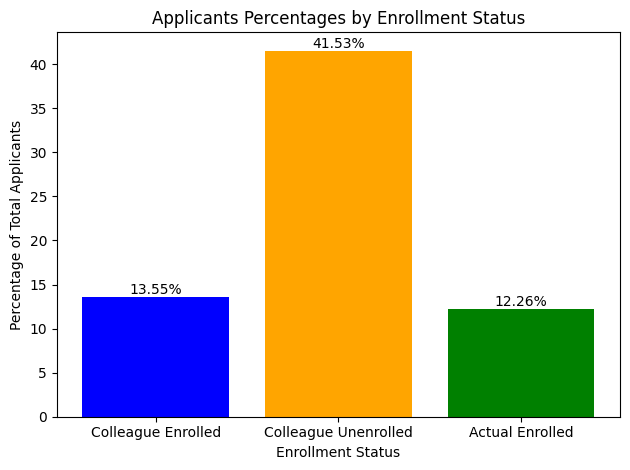

In [ ]:
# Assuming the counts for each subset have been calculated and total_applicants is defined as the length of df
total_applicants = len(df)

# Calculate the percentages for each subset
perc_colleague_enrolled = (len(colleague_enrolled_all) / total_applicants) * 100
perc_colleague_unenrolled = (len(colleague_unenrolled_all) / total_applicants) * 100
perc_actual_enrolled = (len(actual_enrolled) / total_applicants) * 100

# Values for plotting
categories = ['Colleague Enrolled', 'Colleague Unenrolled', 'Actual Enrolled']
percentages = [perc_colleague_enrolled, perc_colleague_unenrolled, perc_actual_enrolled]

# Plotting
fig, ax = plt.subplots()
bars = ax.bar(categories, percentages, color=['blue', 'orange', 'green'])

# Adding the percentage labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Adding the title and labels
plt.title('Applicants Percentages by Enrollment Status')
plt.xlabel('Enrollment Status')
plt.ylabel('Percentage of Total Applicants')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
num_colleague_enrolled = len(colleague_enrolled_all)
num_colleague_unenrolled = len(colleague_unenrolled_all)
num_actual_enrolled = len(actual_enrolled)
total_applicants = len(df)
print(num_colleague_enrolled)
print(num_colleague_unenrolled)
print(num_actual_enrolled)
print(total_applicants)

1396
4278
1263
10300


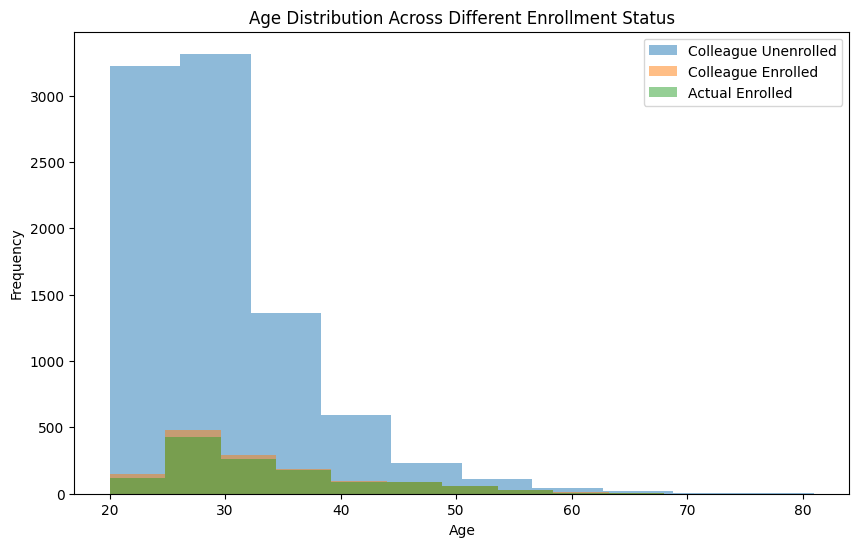

In [ ]:
# Histograms for Age
plt.figure(figsize=(10, 6))
plt.hist(df[df['Applications Registered in Colleague'] == 0]['Age'].dropna(), bins=10, alpha=0.5, label='Colleague Unenrolled')
plt.hist(df[df['Applications Registered in Colleague'] == 1]['Age'].dropna(), bins=10, alpha=0.5, label='Colleague Enrolled')
plt.hist(actual_enrolled['Age'].dropna(), bins=10, alpha=0.5, label='Actual Enrolled')
plt.title('Age Distribution Across Different Enrollment Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()
